# **Importing Necessary Libraries**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data**

In [9]:
df = pd.read_csv("personality trait.csv")

In [10]:
df.head()

,Filename,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,...,Security,Conformity,Tradition,oR,cR,eR,aR,nR,y,g
0,A M Tauhidul Karim Drubo_AIUB,1424,16.56,0,49.37,66.01,31.18,34.83,6.95,4.78,...,0.8,0.9,1.0,0.625,0.889,0.469,0.750,0.375,1990,m
1,Abhijit Mondal_AIUB,1475,16.39,0,48.34,65.36,30.64,35.66,6.58,4.81,...,0.5,0.6,0.9,0.700,0.722,0.531,0.694,0.469,1990,m
2,abhishek Saha_AIUB,1163,18.76,0,49.18,60.19,30.87,31.30,4.90,3.10,...,0.8,0.9,0.8,0.650,0.389,0.562,0.528,0.500,1990,m
3,Abir Md Moshiur Rahman_AIUB,1374,17.17,0,52.84,63.76,30.42,33.62,6.11,3.64,...,0.7,0.4,0.9,0.750,0.611,0.531,0.833,0.375,1990,m
4,abir Tanzin Adnan_AIUB,1175,15.06,0,53.87,61.87,31.06,32.26,5.28,3.40,...,0.6,0.8,1.0,0.650,0.667,0.500,0.778,0.250,1990,m


# **Selecting our target features**

In [11]:
df = df.iloc[:, -17:]

In [12]:
df.head()

,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,oR,cR,eR,aR,nR,y,g
0,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,0.625,0.889,0.469,0.750,0.375,1990,m
1,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,0.700,0.722,0.531,0.694,0.469,1990,m
2,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8,0.650,0.389,0.562,0.528,0.500,1990,m
3,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,0.750,0.611,0.531,0.833,0.375,1990,m
4,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,0.650,0.667,0.500,0.778,0.250,1990,m


<center> <H2>Changing the Features name</h2></center>

In [13]:
df.rename(columns={'oR':'Openness', 'cR':'Conscientiousness', 'eR':'Extraversion', 'aR':'Agreeableness', 'nR':'Neuroticism', 'g':'Gender'}, inplace =True)

In [14]:
df.columns

Index(['Benevolence', 'Universal', 'Self-direction', 'Stimulation', 'Hedonism',
       'Achievement ', 'Power', 'Security', 'Conformity', 'Tradition',
       'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness',
       'Neuroticism', 'y', 'Gender'],
      dtype='object')

In [15]:
df.drop('y', axis=1, inplace = True)

In [16]:
df.drop('Gender', axis=1, inplace = True)

In [17]:
df.shape

(153, 15)

In [18]:
df.head(10)

,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,0.625,0.889,0.469,0.750,0.375
1,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,0.700,0.722,0.531,0.694,0.469
2,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8,0.650,0.389,0.562,0.528,0.500
3,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,0.750,0.611,0.531,0.833,0.375
4,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,0.650,0.667,0.500,0.778,0.250
5,0.9,0.533,0.8,0.5,0.7,0.4,0.9,0.8,0.7,1.0,0.575,0.694,0.500,0.583,0.406
6,0.6,0.533,0.7,0.7,0.5,0.8,0.5,0.8,0.6,0.8,0.500,0.389,0.406,0.556,0.531
7,0.9,0.733,1.0,0.8,0.8,1.0,0.4,0.9,0.6,0.7,0.600,0.639,0.500,0.667,0.438
8,0.8,0.733,0.8,0.7,0.7,0.9,0.7,0.9,0.9,0.9,0.600,0.889,0.500,0.694,0.469
9,1.0,0.933,0.9,0.7,1.0,0.2,0.7,0.7,0.1,0.6,0.725,0.333,0.750,0.806,0.156


<center> <H2>Checking Duplicates</h2></center>

In [19]:
df.duplicated().sum()

0

<center> <H2>Checking Missing Values</h2></center>

In [20]:
df.isna().sum()

Benevolence          0
Universal            0
Self-direction       0
Stimulation          0
Hedonism             0
Achievement          0
Power                0
Security             0
Conformity           0
Tradition            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
dtype: int64

<center> <H2>Basic Statistics</h2></center>

In [21]:
df.describe()

,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.844444,0.784739,0.817647,0.770588,0.735294,0.700654,0.524837,0.794118,0.701961,0.788889,0.632353,0.576595,0.519641,0.648157,0.473033
std,0.127676,0.151342,0.179223,0.181326,0.216269,0.244545,0.242053,0.188566,0.242647,0.189721,0.093712,0.145505,0.100285,0.102157,0.165997
min,0.400000,0.133000,0.300000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.194000,0.156000,0.361000,0.125000
25%,0.800000,0.733000,0.700000,0.600000,0.600000,0.500000,0.400000,0.700000,0.600000,0.700000,0.575000,0.500000,0.469000,0.583000,0.375000
50%,0.900000,0.800000,0.900000,0.800000,0.800000,0.800000,0.500000,0.800000,0.800000,0.800000,0.625000,0.583000,0.500000,0.639000,0.469000
75%,0.900000,0.867000,1.000000,0.900000,0.900000,0.900000,0.700000,0.900000,0.900000,0.900000,0.700000,0.694000,0.594000,0.694000,0.562000
max,1.000000,1.000000,1.000000,1.000000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000,0.917000,0.750000,0.944000,0.906000


<center> <H2>Measure of Dispersion</h2></center>

# Measuring the dispersion of our target variables




<center> <H2>Central Tendency</h2></center>

In [22]:
print(df[['Power', 'Conscientiousness']].std()) # Standard Deviation

Power                0.242053
Conscientiousness    0.145505
dtype: float64


In [23]:
print(df[['Power', 'Openness']].mean()) # mean

Power       0.524837
Openness    0.632353
dtype: float64


In [24]:
print(df[['Power', 'Openness']].median()) # Median

Power       0.500
Openness    0.625
dtype: float64


In [25]:
print(df[['Power', 'Openness']].mode()) # Mode

   Power  Openness
0    0.5      0.65


<center> <H2>Skewness & Kurtosis</h2></center>

In [26]:
print(df[['Power', 'Openness']].skew()) # Skewness of our target variables

Power       0.029190
Openness   -0.276589
dtype: float64


In [27]:
print(df[['Power', 'Openness']].kurt()) # Kurtosis of our target variables

Power      -0.707547
Openness    0.067073
dtype: float64


array([[<Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Openness'}>]], dtype=object)

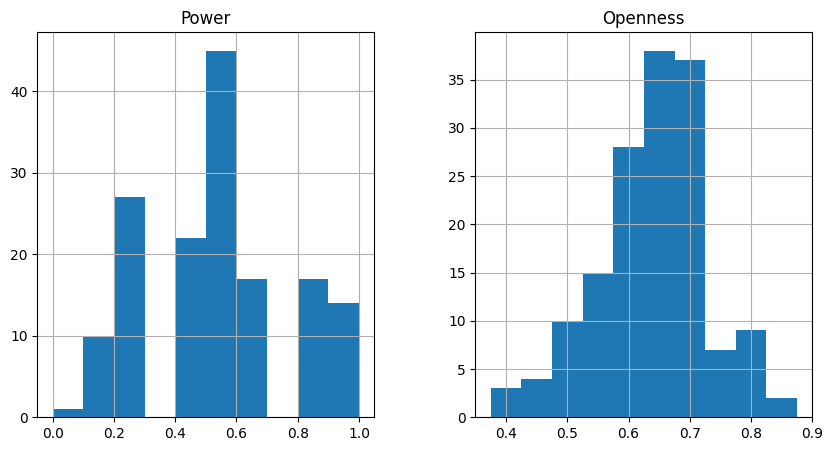

In [28]:
df.hist(column = ['Power', 'Openness'],figsize = (10, 5))

<center> <H2>Outliers</h2></center>

<Axes: >

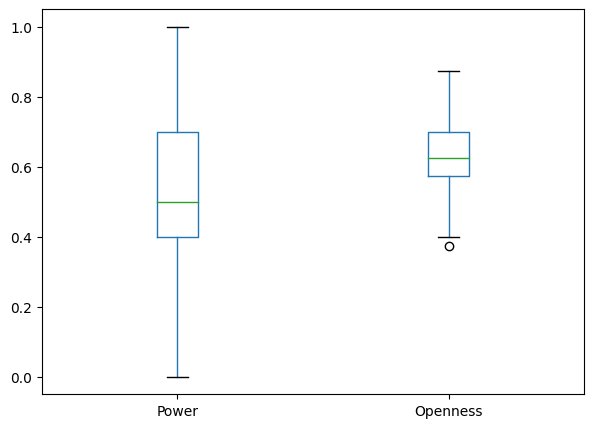

In [29]:
df.boxplot(column = ['Power', 'Openness'], grid = False, figsize =( 7, 5)) # Boxplot of our target variables 

<Axes: >

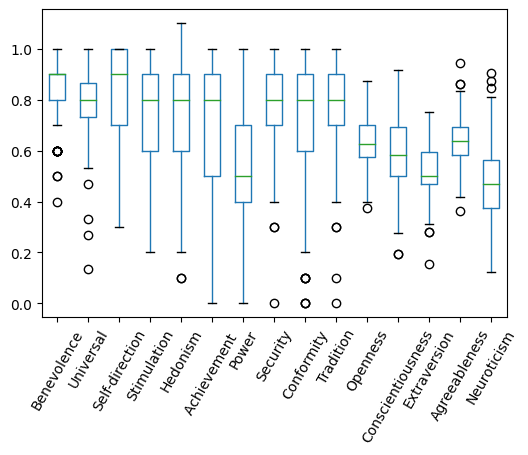

In [30]:
df.boxplot(figsize = (6, 4), rot =60, grid = False) # Boxplot of all the features

<center> <H2>Finding Outliers</h2></center>

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers=((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

Benevolence          13
Universal             4
Self-direction        0
Stimulation           0
Hedonism              2
Achievement           0
Power                 0
Security              3
Conformity            7
Tradition             4
Openness              1
Conscientiousness     2
Extraversion          3
Agreeableness         4
Neuroticism           3
dtype: int64

<center> <H2>Removing Ouliers</h2></center>

In [32]:
df[outliers] = np.nan # replace outliers with np.nan value
df.replace(np.nan, df.mean(), inplace = True) # replace np.nan value with mean value

<Axes: >

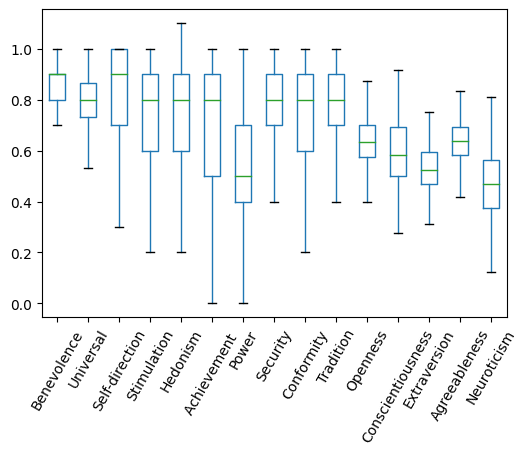

In [33]:
df.boxplot(figsize = (6, 4), rot =60, grid = False) # Boxplot of all the features

<center> <H2>Correlation and Hypothesis</h2></center>

<Axes: >

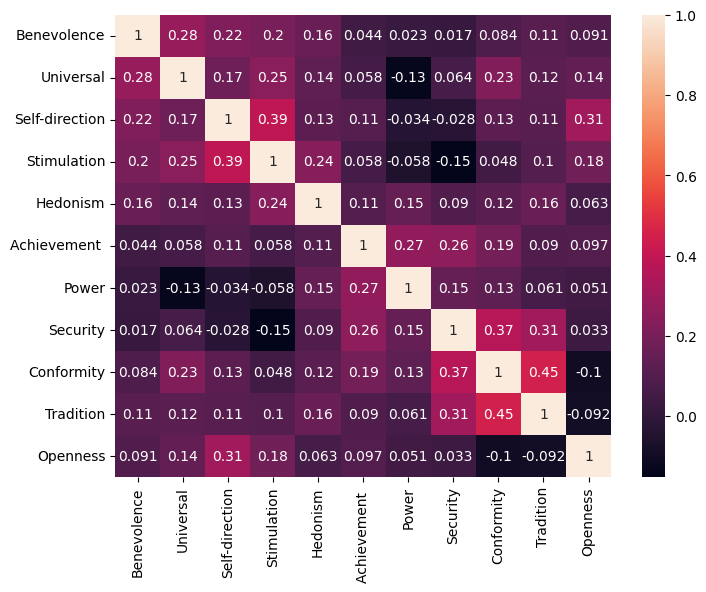

In [34]:
df_c = df.iloc[:, :11]
plt.figure(figsize=(8, 6))
sns.heatmap(data = df_c.corr(), annot=True)

In [35]:
from scipy.stats import chi2_contingency
val=df
#cross table
contigency= pd.crosstab(val['Power'], val['Openness'])

# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)

print("Statistical Value: " + str(c))
print("Degrees of Freedom: " + str(dof))
print("p-value: " + str(p)) 
# print("Expected value: " + str(expected)) 

significance_level = 0.05
if p <= significance_level: 
    print('REJECT NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

Statistical Value: 186.17740025537702
Degrees of Freedom: 190
p-value: 0.5648039376020468
ACCEPT NULL HYPOTHESIS


# Perform SMOTE to handle imbalanced data



In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [37]:
# Divide dataset into Independent and dependent features
X = df.iloc[:, :10]
y = df['Openness']

In [38]:
for val in y:
  if val<0.5: #df['Openness'].mean():
    y.replace(val, 0,inplace = True)
  else:
    y.replace(val, 1, inplace = True)

In [39]:
y.value_counts()

1.0    141
0.0     12
Name: Openness, dtype: int64

In [40]:
#Splitting the dataset into Training set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential #Forward and Backward Propagation
from tensorflow.keras.layers import Dense # for Adding Input, Output and Hidded Layer
from tensorflow.keras.layers import ReLU # Activation Function
from tensorflow.keras.layers import Dropout # Dropping out neurons

In [43]:
classifier = Sequential()
# adding input layer
classifier.add(Dense(units = 10, activation = 'relu')) 
# adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
# adding the first hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
#output layer
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [44]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [45]:
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
9/9 [==============================] - 2s 44ms/step - loss: 0.8911 - accuracy: 0.0370 - val_loss: 0.8382 - val_accuracy: 0.1220
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.8411 - accuracy: 0.0370 - val_loss: 0.8022 - val_accuracy: 0.1220
Epoch 3/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.7987 - accuracy: 0.0370 - val_loss: 0.7711 - val_accuracy: 0.1463
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.7650 - accuracy: 0.1481 - val_loss: 0.7445 - val_accuracy: 0.2439
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.7356 - accuracy: 0.3580 - val_loss: 0.7216 - val_accuracy: 0.2927
Epoch 6/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.7096 - accuracy: 0.5679 - val_loss: 0.6999 - val_accuracy: 0.4878
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.6846 - accuracy: 0.7160 - val_loss: 0.6791 - val_accuracy: 0.7073
Epoch 8/1000
9/

In [46]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

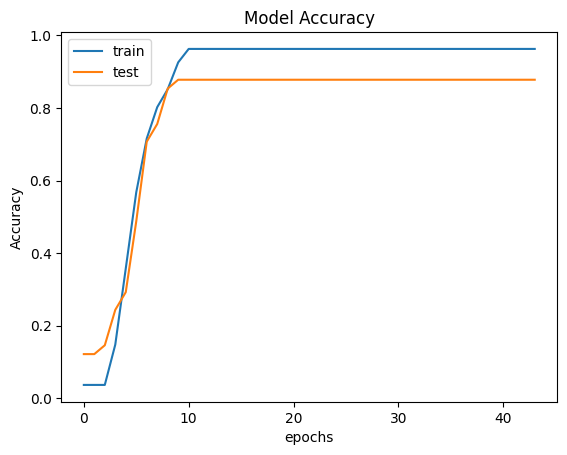

In [47]:
# Summarize history for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 0)
plt.show()

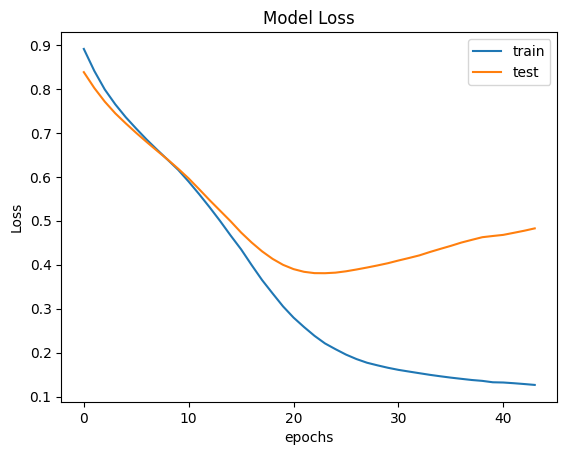

In [48]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 0)
plt.show()

In [49]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>= 0.5)

1/1 [==============================] - 0s 90ms/step


In [50]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  4],
       [ 0, 27]])

In [51]:
# calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8709677419354839

In [52]:
classifier.get_weights()

[array([[-0.17938426,  0.46740076, -0.02138144, -0.4650347 ,  0.11945698,
         -0.65455157,  0.18965675,  0.17125918,  0.14221181,  0.08697044],
        [-0.22653991, -0.10635006,  0.39685073, -0.01901771, -0.20767863,
          0.35103658, -0.31906828,  0.35911334,  0.46251288,  0.02228946],
        [-0.05454957, -0.51595265, -0.4934414 ,  0.28523374, -0.03717801,
         -0.18719575, -0.3244896 ,  0.31051597,  0.554703  ,  0.35976788],
        [-0.44163868,  0.54938495,  0.52684224,  0.6240897 ,  0.05053283,
          0.07353906, -0.20324567, -0.6753293 ,  0.54513484,  0.05978664],
        [-0.19456829, -0.38216415, -0.30535913,  0.21788934,  0.45827484,
         -0.02639636,  0.39752287, -0.39980692,  0.1124608 , -0.43202025],
        [-0.5707284 ,  0.39018816, -0.32717788, -0.13825718, -0.2935993 ,
         -0.06328698,  0.49796638, -0.11738932, -0.23218508, -0.01156533],
        [-0.3059904 , -0.6493682 , -0.20326115, -0.03837929, -0.23148297,
         -0.13678205,  0.2045347

#lstm model

In [53]:
#lstm model

X = df.iloc[:, :10].values 
y = df.iloc[:, 10:].values
# Reshape the input features to fit the LSTM input shape
X_1 = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_1.shape[1], X_1.shape[2])))
model.add(Dense(5))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=5)

# Predict the output variables for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error between the predicted and actual outputs
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Epoch 1/1000
25/25 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.0246
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.2623
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9180
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9180
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9180
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9180
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9180
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9180
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9180
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9180

In [54]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.033424824476242065
Test accuracy: 0.9354838728904724


In [55]:
for i in range(5):
    print("Example", i+1)
    print("Input features:", X_test[i])
    print("Actual output:", y_test[i])
    print("Predicted output:", y_pred[i])
    print()

Example 1
Input features: [[0.9 0.8 0.9 1.  1.  0.9 0.6 0.8 0.7 0.9]]
Actual output: [1.    0.5   0.594 0.75  0.531]
Predicted output: [1.0044519  0.522632   0.552767   0.6858902  0.49469286]

Example 2
Input features: [[0.8   0.933 0.9   0.8   0.4   0.5   0.5   0.9   0.9   1.   ]]
Actual output: [1.    0.417 0.469 0.528 0.688]
Predicted output: [0.75516677 0.6137749  0.4551093  0.6100155  0.43392777]

Example 3
Input features: [[1.    0.867 0.6   0.6   0.9   0.3   0.3   0.7   0.6   0.9  ]]
Actual output: [0.         0.583      0.469      0.64524161 0.25      ]
Predicted output: [1.3237537  0.6757175  0.4951073  0.6903193  0.43123138]

Example 4
Input features: [[0.87  0.8   1.    0.9   0.8   0.5   0.2   0.806 0.3   0.7  ]]
Actual output: [1.         0.333      0.625      0.667      0.46499333]
Predicted output: [1.0935868  0.53114176 0.55120796 0.7072573  0.46368432]

Example 5
Input features: [[1.  0.8 1.  0.7 0.6 0.8 0.7 1.  1.  1. ]]
Actual output: [1.    0.528 0.688 0.417 0.5  ]
P

In [56]:
X_1.shape

(153, 1, 10)

In [57]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#MultiOutputRegressor

In [58]:
#MultiOutputRegressor 
X = df.iloc[:, :10].values
y = df.iloc[:, 10:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor using MultiOutputRegressor
regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
regressor.fit(X_train, y_train)

# Predict the output variables for the test set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error between the predicted and actual outputs
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.02443697876623078


In [59]:
score = regressor.score(X_train, y_train)
print("Training score:", score)


Training score: 0.847010637129751


In [60]:
for i in range(5):
    print("Example", i+1)
    print("Input features:", X_test[i])
    print("Actual output:", y_test[i])
    print("Predicted output:", y_pred[i])
    print()

Example 1
Input features: [0.9 0.8 0.9 1.  1.  0.9 0.6 0.8 0.7 0.9]
Actual output: [1.    0.5   0.594 0.75  0.531]
Predicted output: [0.99       0.62672    0.56802    0.69452242 0.37173   ]

Example 2
Input features: [0.8   0.933 0.9   0.8   0.4   0.5   0.5   0.9   0.9   1.   ]
Actual output: [1.    0.417 0.469 0.528 0.688]
Predicted output: [0.99       0.66223    0.51359493 0.66786691 0.44244   ]

Example 3
Input features: [1.    0.867 0.6   0.6   0.9   0.3   0.3   0.7   0.6   0.9  ]
Actual output: [0.         0.583      0.469      0.64524161 0.25      ]
Predicted output: [1.         0.60614    0.4731174  0.67859725 0.38715   ]

Example 4
Input features: [0.87  0.8   1.    0.9   0.8   0.5   0.2   0.806 0.3   0.7  ]
Actual output: [1.         0.333      0.625      0.667      0.46499333]
Predicted output: [0.92       0.57972325 0.52191987 0.68843174 0.46628   ]

Example 5
Input features: [1.  0.8 1.  0.7 0.6 0.8 0.7 1.  1.  1. ]
Actual output: [1.    0.528 0.688 0.417 0.5  ]
Predicted o

#neural network model

In [61]:
#neural network model
X = df.iloc[:, :10].values
y = df.iloc[:, 10:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(20, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5))

# Compile the model
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=5)

# Predict the output variables for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error between the predicted and actual outputs
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.9180
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.7377
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.4426
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.7295
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.7787
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.8607
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.8852
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.8852
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.8770
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.8934

In [62]:
for i in range(5):
    print("Example", i+1)
    print("Input features:", X_test[i])
    print("Actual output:", y_test[i])
    print("Predicted output:", y_pred[i])
    print()

Example 1
Input features: [0.9 0.8 0.9 1.  1.  0.9 0.6 0.8 0.7 0.9]
Actual output: [1.    0.5   0.594 0.75  0.531]
Predicted output: [0.932553   0.59080213 0.5544238  0.67480266 0.46904445]

Example 2
Input features: [0.8   0.933 0.9   0.8   0.4   0.5   0.5   0.9   0.9   1.   ]
Actual output: [1.    0.417 0.469 0.528 0.688]
Predicted output: [0.9712313  0.64835674 0.5046325  0.65724933 0.39827785]

Example 3
Input features: [1.    0.867 0.6   0.6   0.9   0.3   0.3   0.7   0.6   0.9  ]
Actual output: [0.         0.583      0.469      0.64524161 0.25      ]
Predicted output: [1.0091009  0.5281645  0.43506753 0.6775072  0.56759   ]

Example 4
Input features: [0.87  0.8   1.    0.9   0.8   0.5   0.2   0.806 0.3   0.7  ]
Actual output: [1.         0.333      0.625      0.667      0.46499333]
Predicted output: [0.94951886 0.5646581  0.58884394 0.6512401  0.36361408]

Example 5
Input features: [1.  0.8 1.  0.7 0.6 0.8 0.7 1.  1.  1. ]
Actual output: [1.    0.528 0.688 0.417 0.5  ]
Predicted o

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [64]:
X = df.iloc[:, :10].values
y = df.iloc[:, 10:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the KNN regression model
model = KNeighborsRegressor(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Predict the output variables for the test set
y_pred = model.predict(X_test)

# Print the accuracy of the predictions
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: -0.11319038482887525


In [65]:
#accuracy nagetive ashtase cause regression problem amader datar classification er na


In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
# Separate the input features and output variables
X = df.iloc[:, :10].values
y = df.iloc[:, 10:].values

# Scale the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the K-means clustering model
model = KMeans(n_clusters=5, random_state=42)

# Fit the K-means model to the input data
model.fit(X_scaled)

# Get the cluster labels for each data point
cluster_labels = model.labels_

# Concatenate the input features and cluster labels
X_clustered = np.concatenate((X_scaled, cluster_labels.reshape((-1, 1))), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.2, random_state=42)

# Define the regression model
reg_model = LinearRegression()

# Train the regression model on the training data
reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Evaluate the accuracy of the regression model
accuracy = reg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: -0.13191031663744185
